In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [386]:
# importing the dataset
df = pd.read_csv('menu.csv')
# to understand the dataset.
df.head()



,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [387]:
# using to get info of Dtype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [388]:
# Split the Serving Size into numeric values and units
df[['Serving Size Value', 'Serving Size Unit']] = df['Serving Size'].str.extract(r'(\d+\.?\d*)\s*([a-zA-Z]+)')

# Convert the Serving Size Value to float
df['Serving Size Value'] = df['Serving Size Value'].astype(float)

# Display the updated DataFrame with new columns
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size Value,Serving Size Unit
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,4.8,oz
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,4,17,3,18,6,0,25,8,4.8,oz
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,4,17,2,14,8,0,25,10,3.9,oz
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,4,17,2,21,15,0,30,15,5.7,oz
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,4,17,2,21,6,0,25,10,5.7,oz


In [389]:
# using to get info of Dtype of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

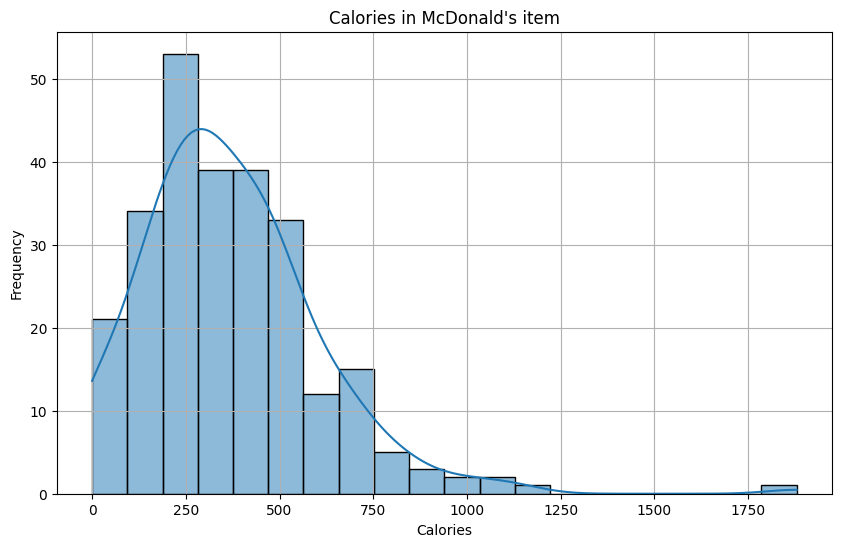

In [390]:
# Question A.
# Plot of histogram of frequency vs calories
plt.figure(figsize=(10,6))
sns.histplot(df['Calories'], bins=20, kde=True)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title("Calories in McDonald's item")
plt.grid(True)
plt.show()


Question 1 Part B: Plotting heat map of the features and calories.

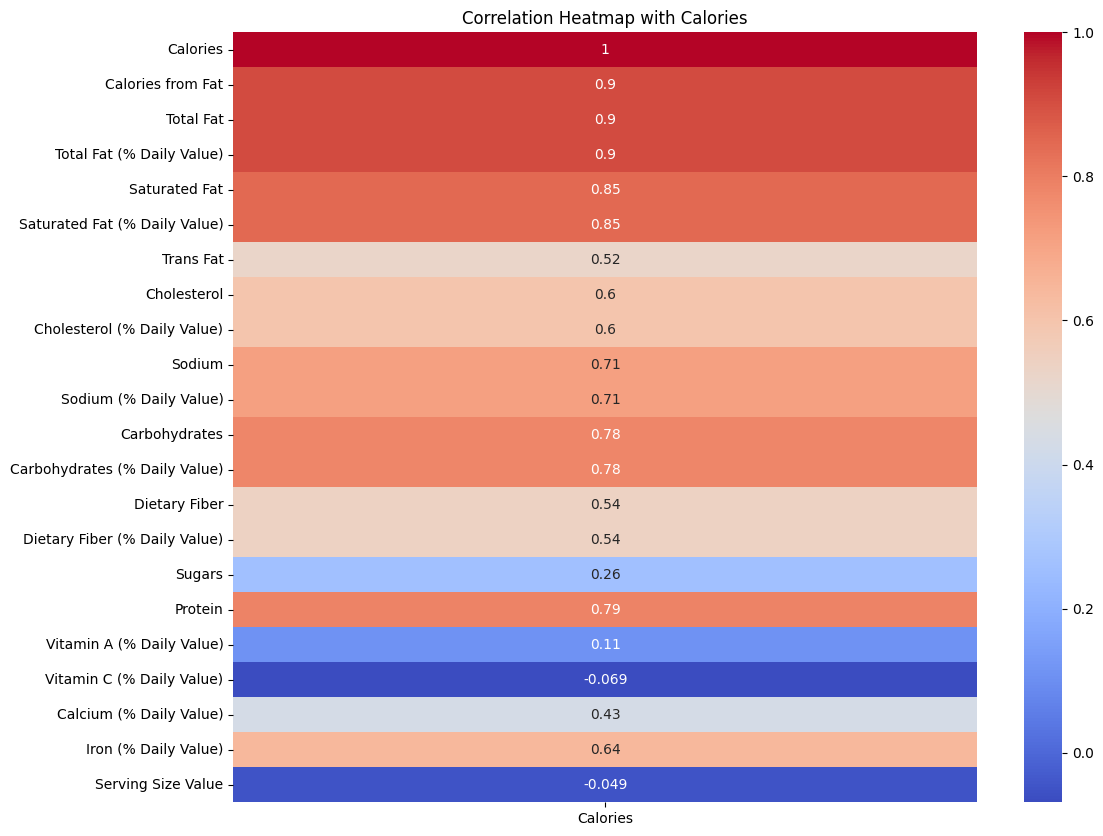

In [391]:
# Part B: Plotting heat map of the features and calories.
# # Dropping non-numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# to Calculate the correlation matrix with Calories
correlation_matrix = numeric_df.corr()

# tp Focus on the correlation with Calories
calories_correlation = correlation_matrix[['Calories']]


# to plot the heatmap for correlation with Calories
plt.figure(figsize=(12, 10))
sns.heatmap(calories_correlation, annot=True, cmap='coolwarm', cbar=True)

# Title to the heatmap
plt.title('Correlation Heatmap with Calories')


plt.show()


Question 1 part C: 

In [392]:
# Sort the correlation values with Calories in descending order to find the second and third largest positive correlations
sorted_correlations = calories_correlation['Calories'].sort_values(ascending=False)

# Create a list of columns to ignore that represent similar features (like % Daily Value)
columns_to_ignore = [
    'Calories from Fat',  # Keep Total Fat, ignore derived Calories from Fat
    'Total Fat (% Daily Value)',
    'Saturated Fat (% Daily Value)',
    'Trans Fat (% Daily Value)',
    'Cholesterol (% Daily Value)',
    'Sodium (% Daily Value)',
    'Carbohydrates (% Daily Value)',
    'Dietary Fiber (% Daily Value)',
    'Vitamin A (% Daily Value)',
    'Vitamin C (% Daily Value)',
    'Calcium (% Daily Value)',
    'Iron (% Daily Value)', 
    'Serving Size'
    # Ignored  the % daily value to only keep the raw values of the listed amount in an item.
]

# Filter the sorted correlations to exclude these similar columns
filtered_correlations = sorted_correlations.drop(columns_to_ignore, errors='ignore')

# Second and third largest positive correlations after filtering
second_largest_correlation_filtered = round(filtered_correlations[1]*100, 3)  # second largest
third_largest_correlation_filtered = round(filtered_correlations[2]*100, 3)   # third largest

# Extract the feature names corresponding to these correlations
second_largest_feature_filtered = filtered_correlations.index[1]
third_largest_feature_filtered = filtered_correlations.index[2]

# The results
second_largest_feature_filtered, second_largest_correlation_filtered, third_largest_feature_filtered, third_largest_correlation_filtered


/var/folders/b2/twq2l_xd0gnd4zml9hnc4yr00000gn/T/ipykernel_48739/1321099250.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  second_largest_correlation_filtered = round(filtered_correlations[1]*100, 3)  # second largest
/var/folders/b2/twq2l_xd0gnd4zml9hnc4yr00000gn/T/ipykernel_48739/1321099250.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  third_largest_correlation_filtered = round(filtered_correlations[2]*100, 3)   # third largest


('Total Fat', 90.441, 'Saturated Fat', 84.556)

Question 1 part D: Only negative correlation is with vitamin C and serving size value, which was a new column I created in order to make the column as a float instead of a object. 

In [393]:

negative_correlations_with_calories = correlation_matrix['Calories'][correlation_matrix['Calories'] < 0]

negative_correlations_with_calories


Vitamin C (% Daily Value)   -0.068747
Serving Size Value          -0.048790
Name: Calories, dtype: float64

Question 2 (a): Plotting a scatter plot using sns

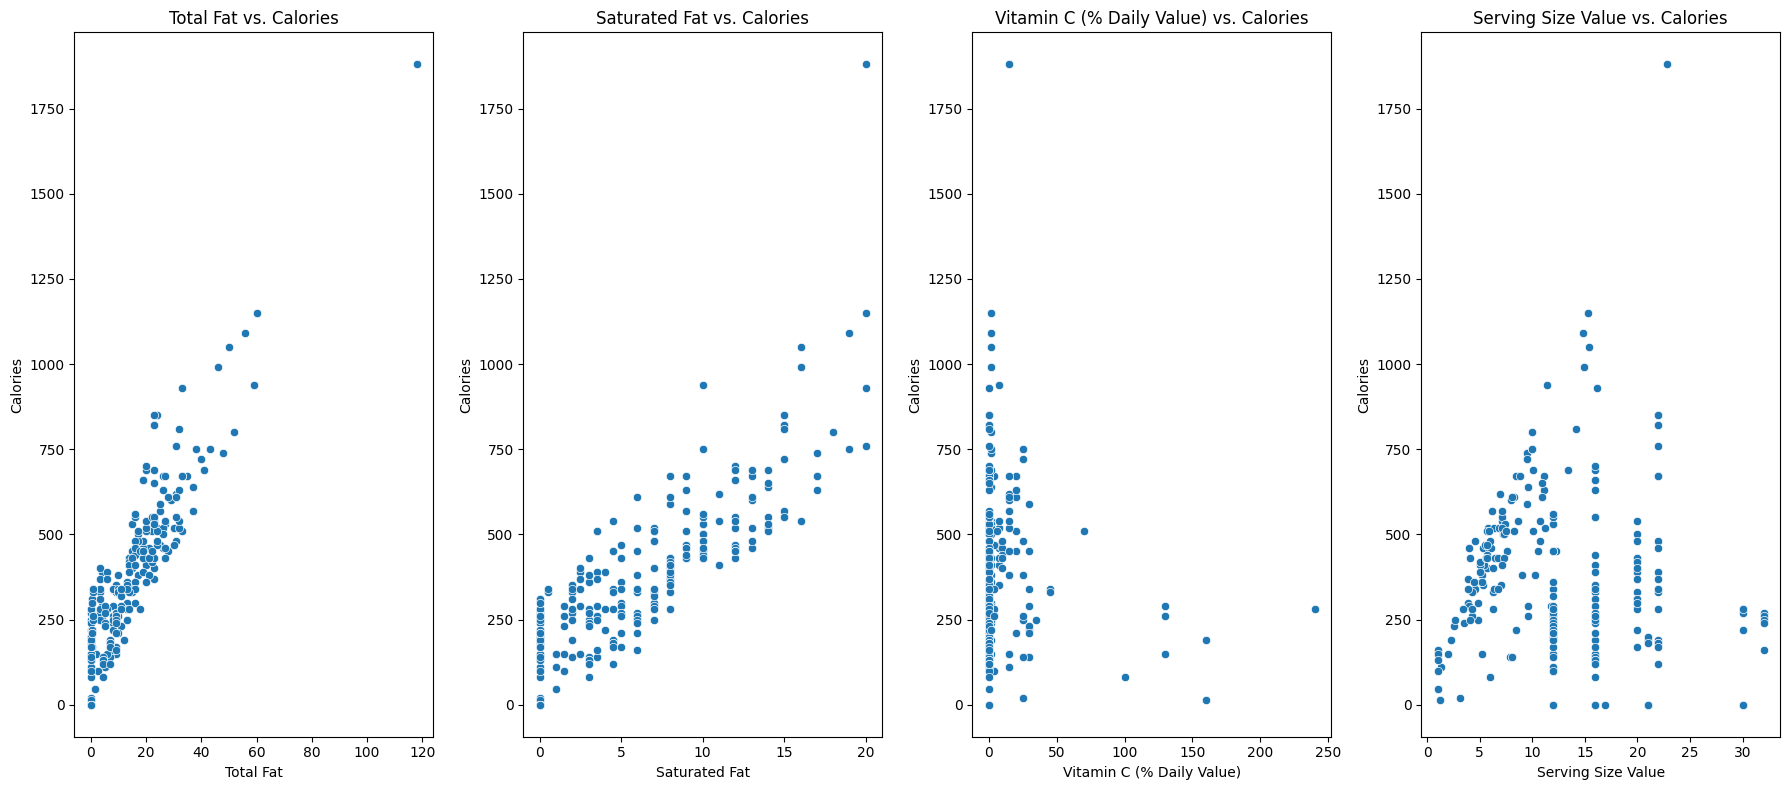

In [394]:

#Setting up features of the scatter plot. Adjusting to 3 plots.
fig, axes = plt.subplots(1, 4, figsize=(18, 8))  

# Scatter plot for 'Calories from Fat' vs 'Calories'
sns.scatterplot(ax=axes[0], data=df, x='Total Fat', y='Calories')
axes[0].set_title('Total Fat vs. Calories')
axes[0].set_xlabel('Total Fat')
axes[0].set_ylabel('Calories')

# Scatter plot for 'Total Fat' vs 'Calories'
sns.scatterplot(ax=axes[1], data=df, x='Saturated Fat', y='Calories')
axes[1].set_title('Saturated Fat vs. Calories')
axes[1].set_xlabel('Saturated Fat')
axes[1].set_ylabel('Calories')

# Scatter plot for 'Vitamin C (% Daily Value)' vs 'Calories' since it has a negative correlation
sns.scatterplot(ax=axes[2], data=df, x='Vitamin C (% Daily Value)', y='Calories')
axes[2].set_title('Vitamin C (% Daily Value) vs. Calories')
axes[2].set_xlabel('Vitamin C (% Daily Value)')
axes[2].set_ylabel('Calories')

# Scatter plkot for 'Serving Size Value' vs 'Calories' since it has a negative correlation
sns.scatterplot(ax=axes[3], data=df, x='Serving Size Value', y='Calories')
axes[3].set_title('Serving Size Value vs. Calories')
axes[3].set_xlabel('Serving Size Value')
axes[3].set_ylabel('Calories')


plt.tight_layout()
plt.show()


Question 2 part b: Boxplot for the 2 correlated and negative correlated results. I used seaborn to plot the boxplot. 

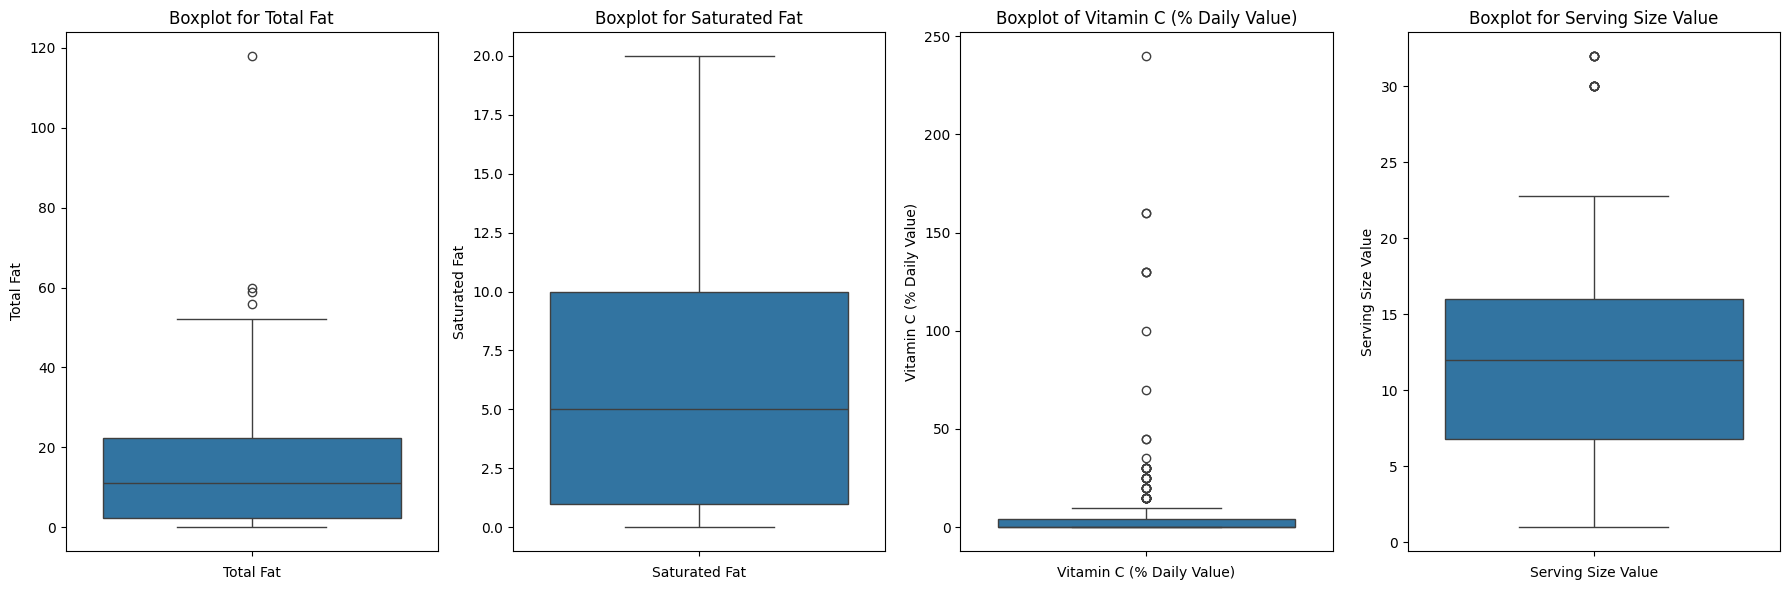

In [395]:
# Subplots for each feature
fig, axes = plt.subplots(1, 4, figsize=(18, 6))  

# Box plot for 'Total Fat'
sns.boxplot(ax=axes[0], y=df['Total Fat'])
axes[0].set_title('Boxplot for Total Fat')
axes[0].set_xlabel('Total Fat')


# Box plot for 'Saturated Fat'
sns.boxplot(ax=axes[1], y=df['Saturated Fat'])
axes[1].set_title('Boxplot for Saturated Fat')
axes[1].set_xlabel('Saturated Fat')


# Box plot for 'Vitamin C (% Daily Value)'
sns.boxplot(ax=axes[2], y=df['Vitamin C (% Daily Value)'])
axes[2].set_title('Boxplot of Vitamin C (% Daily Value)')
axes[2].set_xlabel('Vitamin C (% Daily Value)')


# Boxplot for 
sns.boxplot(ax=axes[3], y=df['Serving Size Value'])
axes[3].set_title('Boxplot for Serving Size Value')
axes[3].set_xlabel('Serving Size Value')


plt.tight_layout()
plt.show()

Question 3 part a: 

In [396]:

# Calculate the median and standard deviation only for numeric columns
# used numpy and select method to only include numbers in the input and output
median_values = df.select_dtypes(include=[np.number]).median()
std_dev_values = df.select_dtypes(include=[np.number]).std()

# to print the output of the median and standard deviation
print("Medians of values:")
print(median_values)
print("Standard Deviations of Values:")
print(std_dev_values)

Medians of values:
Calories                         340.0
Calories from Fat                100.0
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Trans Fat                          0.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Sugars                            17.5
Protein                           12.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
Calcium (% Daily Value)           20.0
Iron (% Daily Value)               4.0
Serving Size Value                12.0
dtype: float64
Standard Deviations of Values:
Calories                         240.269886
Calories from Fat                

Question 3 part b:

In [397]:
# Replace outliers with NaN for all numerical columns. 
# This process was done using a 3 sigma rule on replacing outliers.
def replace_outliers_with_nan(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        cutoff = std_dev * 3 
        lower, upper = mean - cutoff, mean + cutoff
        df[column] = df[column].mask((df[column] < lower) | (df[column] > upper)) #used the mask function to replace outliers
    return df

# Made a copy of the DF to not change the original dataset.
df_modified = replace_outliers_with_nan(df.copy())

# Counting NaNs introduced by replacing outliers
nan_counts = df_modified.isna().sum()
print("Total number of NaNs per feature after replacing outliers:")
print(nan_counts)

Total number of NaNs per feature after replacing outliers:
Category                         0
Item                             0
Serving Size                     0
Calories                         3
Calories from Fat                3
Total Fat                        3
Total Fat (% Daily Value)        3
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        9
Cholesterol                      4
Cholesterol (% Daily Value)      4
Sodium                           3
Sodium (% Daily Value)           3
Carbohydrates                    5
Carbohydrates (% Daily Value)    5
Dietary Fiber                    4
Dietary Fiber (% Daily Value)    4
Sugars                           3
Protein                          2
Vitamin A (% Daily Value)        6
Vitamin C (% Daily Value)        7
Calcium (% Daily Value)          0
Iron (% Daily Value)             3
Serving Size Value               0
Serving Size Unit                0
dtype: int64


Question 3 part C: needed to only include numeric values in order to get an accurate value after filling missing datasets with NaN. 

In [398]:
# Replace NaNs with the mean of each numeric column only
numeric_columns = df_modified.select_dtypes(include=[np.number])
df_modified[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

# Recalculate the median and standard deviation only for numeric columns
new_median_values = numeric_columns.median()
new_std_dev_values = numeric_columns.std()

# Display the updated median and standard deviation
print("Updated Medians of numerical features:")
print(new_median_values)
print("\nUpdated Standard Deviations of numerical features:")
print(new_std_dev_values)

Updated Medians of numerical features:
Calories                         340.0
Calories from Fat                100.0
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Trans Fat                          0.0
Cholesterol                       32.5
Cholesterol (% Daily Value)       11.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Sugars                            17.0
Protein                           12.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
Calcium (% Daily Value)           20.0
Iron (% Daily Value)               4.0
Serving Size Value                12.0
dtype: float64

Updated Standard Deviations of numerical features:
Calories                         211

Question 4 part a: Chose Linear Regression because in the correlation matrix, I did see that all 3 have a strong correlation with calories. There was not too many variables to use random forest. 

In [399]:
# Selecting features and target
X = df[['Carbohydrates', 'Protein', 'Total Fat']]
y = df['Calories']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Extracting the coefficients and intercept
theta0 = model.intercept_
theta1, theta2, theta3 = model.coef_

print(f"Intercept (θ0): {theta0}")
print(f"Carbohydrates Coefficient (θ1): {theta1}")
print(f"Protein Coefficient (θ2): {theta2}")
print(f"Total Fat Coefficient (θ3): {theta3}")

Intercept (θ0): -1.8292919301433699
Carbohydrates Coefficient (θ1): 3.9789690330382337
Protein Coefficient (θ2): 4.045248580190021
Total Fat Coefficient (θ3): 9.018622055128327


Check to see the importance of my variables while to a split using linear regression. I went with fat because the high correlation of fats in high calories food items. 

In [400]:
# Prepare data for the total fat. 
X_fat = df[['Total Fat']]

# Initialize and fit the model
model_fat = LinearRegression()
model_fat.fit(X_fat, y)

# Extracting coefficients
theta0_fat = model_fat.intercept_
theta1_fat = model_fat.coef_[0]

print(f"Intercept (θ0): {theta0_fat}")
print(f"Total Fat Coefficient (θ1): {theta1_fat}")


Intercept (θ0): 151.58818902493172
Total Fat Coefficient (θ1): 15.296516658571205


Question 4: MSE value. Used train test split to run the code with a 90% train and 10% test. 

In [401]:

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Train the model on training data
model_full = LinearRegression()
model_full.fit(X_train, y_train)

# Predict and evaluate the model
y_train_pred = model_full.predict(X_train)
y_test_pred = model_full.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE on Training set: {mse_train}")
print(f"MSE on Test set: {mse_test}")

MSE on Training set: 28.941607778599018
MSE on Test set: 51.28942223910951
